## Modelo ML - Kaggle Titanic

#### Carga dados de treino

<AxesSubplot:>

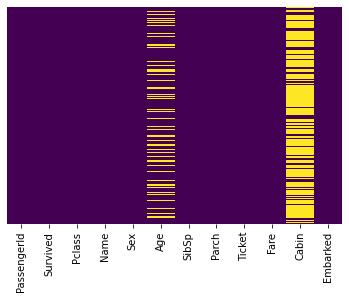

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


train_path = "../data/train.csv" 
train_data = pd.read_csv(train_path)
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

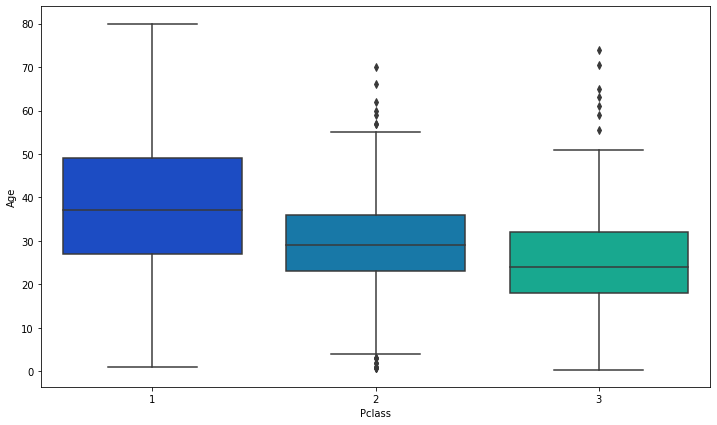

In [2]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='winter')

In [3]:
train_data.groupby(['Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch       Fare
Pclass                                                                 
1        461.597222  0.629630  38.233441  0.416667  0.356481  84.154687
2        445.956522  0.472826  29.877630  0.402174  0.380435  20.662183
3        439.154786  0.242363  25.140620  0.615071  0.393075  13.675550

#### Preenchendo coluna 'Age' e Convertendo coluna 'Sex' categórica para numérica

<AxesSubplot:>

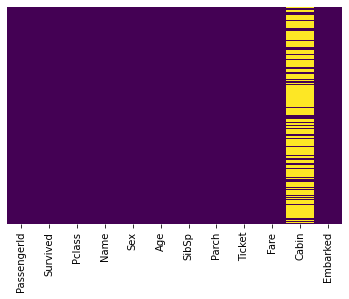

In [4]:
IDADE_CLASSE = {1: 38.2, 2: 29.9, 3: 25.1}
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return IDADE_CLASSE[1]
        elif Pclass == 2:
            return IDADE_CLASSE[2]
        else:
            return IDADE_CLASSE[3]
    else:
        return Age
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [5]:
sex = pd.get_dummies(train_data['Sex'], drop_first=True)
train_data = pd.concat([train_data,sex],axis=1)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  male         891 non-null    uint8  
dtypes: float64(2), int64(5), object(5), uint8(1)
memory usage: 84.5+ KB


#### Treinando modelo de ML e validando

In [6]:
#Target
y = train_data.Survived

features = ['Age', 'male', 'Pclass'] #Sibsp Parch??
X = train_data[features]

In [7]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
logmodel = LogisticRegression(random_state=42)
logmodel.fit(X_train,y_train)
test_preds = logmodel.predict(X_test)


#### Métricas de desempenho do modelo

In [8]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test,test_preds))
print("Accuracy:", accuracy_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       156
           1       0.77      0.77      0.77       112

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

Accuracy: 0.8097014925373134


#### Ajustando dados de teste

In [9]:
test_path = "../data/test.csv" 
test_data = pd.read_csv(test_path)
test_data['Age'] = test_data[['Age','Pclass']].apply(impute_age,axis=1)
sex = pd.get_dummies(test_data['Sex'], drop_first=True)
test_data = pd.concat([test_data,sex],axis=1)
X_test_sub= test_data[features]

#### Modelo final para envio

In [10]:
logmodel_sub = LogisticRegression(random_state=42)
logmodel_sub.fit(X,y)
test_preds_subs = logmodel_sub.predict(X_test_sub)
output = pd.DataFrame({'PassengerId': test_data.PassengerId,
                       'Survived': test_preds_subs})
output.to_csv('../data/submission.csv', index=False)